# Face recognition with ORL

## 1 - Packages ##

First, let's run the cell below to import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a famous library to plot graphs in Python.


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from utils import load_dataset, image_width, image_height

plt.gray()

In [11]:
# Loading the ORL faces dataset
train_X, train_Y, test_X, test_Y = load_dataset()

print ("train_X shape: " + str(train_X.shape))
print ("train_Y shape: " + str(train_Y.shape))
print ("test_X shape: " + str(test_X.shape))
print ("test_Y shape: " + str(test_Y.shape))

train_X shape: (320, 92, 112, 1)
train_Y shape: (320, 1)
test_X shape: (80, 92, 112, 1)
test_Y shape: (80, 1)


In [12]:
# Let's standardize our dataset.
train_X = train_X/255.
test_X = test_X/255.

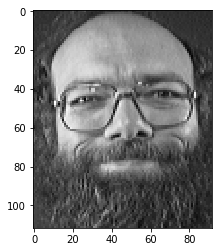

In [13]:
# Example of a picture
index = 31
plt.imshow(train_X[index].reshape(image_height, image_width))
# plt.show()
# print ("y = " + str(Y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [14]:
# Reshape the training and test examples so that images of size (92, 112, 1) are flattened into single vectors 

train_X = train_X.reshape(train_X.shape[0], -1).T
test_X = test_X.reshape(test_X.shape[0], -1).T
print ("flattened train_X: " + str(train_X.shape))
print ("flattened test_X: " + str(test_X.shape))

flattened train_X: (10304, 320)
flattened test_X: (10304, 80)


In [21]:
#Euclidean distance between 2-dimensional point
def dist (A, B):
    return np.sqrt(np.sum((A - B)**2))

In [22]:
from scipy.spatial import distance

def dist2 (A, B):
    return scipy.spatial.distance.euclidean(A, B)

In [34]:
print(train_X.T[0:1].shape)
dst = dist(train_X.T[0:1], test_X.T[0:1])
print(dst)
# dst2 = dist2(train_X.T[0:1], test_X.T[0:1])
# print(dst2)

(1, 10304)
13.10218


In [81]:
def classifyKNN (trainData, trainLabels, testData, k, numberOfClasses):
    #Euclidean distance between 2-dimensional point
#     def dist (a, b):
#         return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
    testLabels = []	
    for testPoint in testData:
#         print(trainLabels[0].shape)

        #Claculate distances between test point and all of the train points
        testDist = [ [dist(testPoint, trainData[i]), trainLabels[i][0]] for i in range(trainData.shape[0])]
        #How many points of each class among nearest K
        stat = [0 for i in range(numberOfClasses)]
#         print(testDist)

        for d in sorted(testDist)[0:k]:
#             print(d)
            stat[d[1]] += 1.0
        #Assign a class with the most number of occurences among K nearest neighbours
        testLabels.append( sorted(zip(stat, range(numberOfClasses)), reverse=True)[0][1] )
    return testLabels

In [87]:
lbs = classifyKNN(train_X.T, train_Y, test_X.T, 3, 40)

In [98]:
print(np.array(lbs))
print(np.reshape(test_Y, (1, 80))[0])

[13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4 10 36 27 35
  3  5 34 12 29  2 18 16 15 24 30  3  3 12 18 37 28 36 14 28 37 17  9 33
 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31 23  7  8 29 24 27 21  9
 35 19 25 32 19 11  4 17]
[13 35 39 26 32 20  8 12 34 36  9  8 26 11 29  5 32 25 35  4 10 36 27 35
  3  5 34 12 29  2 18 16 15 24 20  3  3 12 18 37 28 36 14 28 37 17  9 33
 33 19 24 11 26  7 33  2 16 33 38 17 38  3 19 31  8  7  8 29 24 27 21  0
 35 19 25 32 19 11  4 17]


In [111]:
print ("Accuracy: ", (np.array(lbs) == np.reshape(test_Y, (1, 80))[0]).mean())

Accuracy:  0.9625
